# Ensembles and random forest
## Feature importance
[Link](https://mlcourse.ai/book/topic05/topic5_part3_feature_importance.html)

## Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

## Data

In [2]:
iris = load_iris()
data = iris["data"]
target = iris["target"]

data = pd.DataFrame(data, columns=iris["feature_names"])
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Since our aim is just to demonstrate the sequence of steps in calculating feature importances we’ll transform the target variable as for classifying Iris Virginica One-To-All.

In [3]:
target = pd.Series(target).map({0: 0, 1: 0, 2: 1})

In [4]:
rfc = RandomForestClassifier(
    n_estimators=3,
    max_depth=3,
    random_state=17
)
rfc.fit(data, target);

In [5]:
tree_list = rfc.estimators_
tree_list

[DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1265576559),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=780729585),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=131369103)]

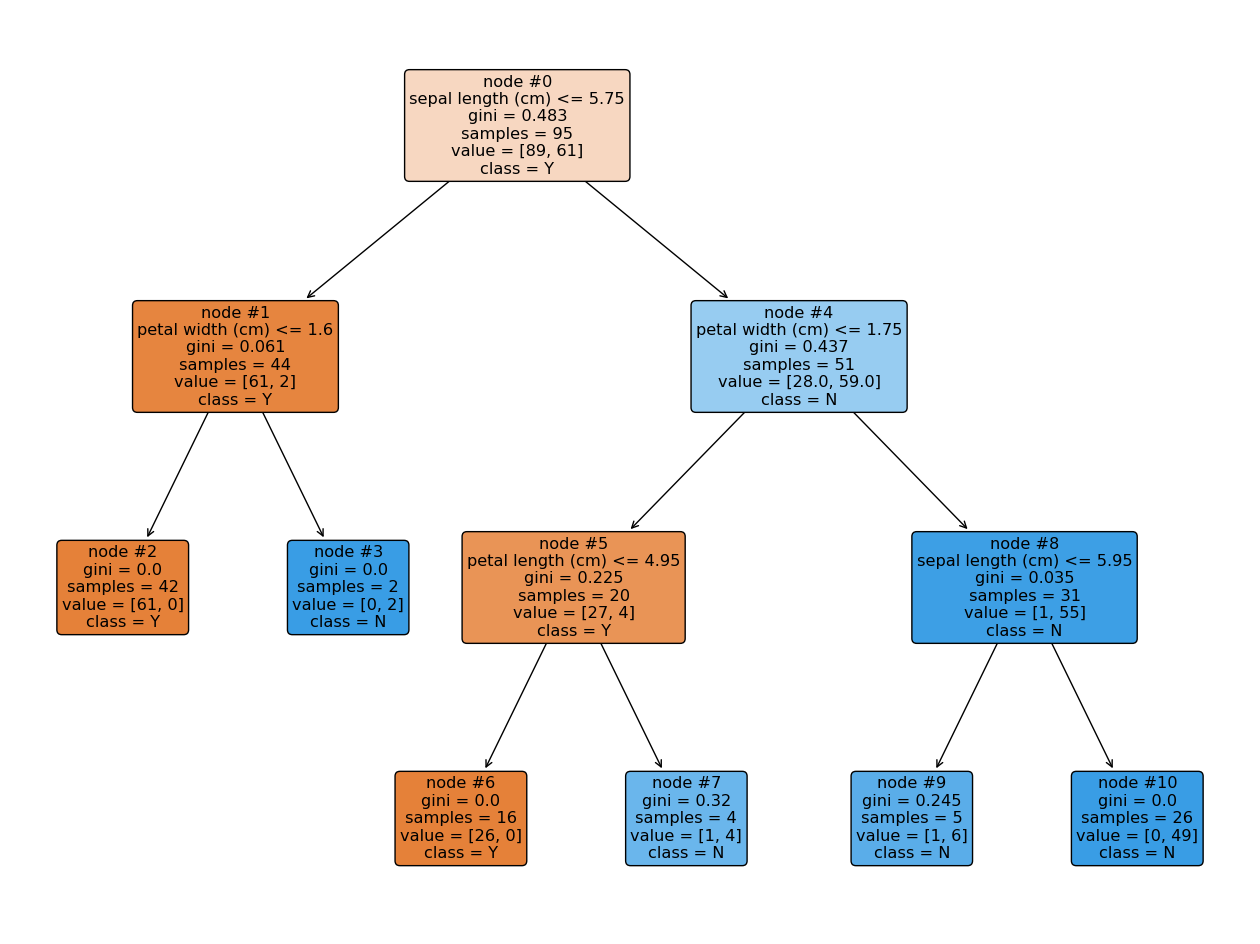

In [6]:
plt.figure(figsize=(16, 12))

tree.plot_tree(
    tree_list[0],
    filled=True,
    feature_names=iris["feature_names"],
    class_names=["Y", "N"],
    node_ids=True,
    rounded=True,
)
plt.show()

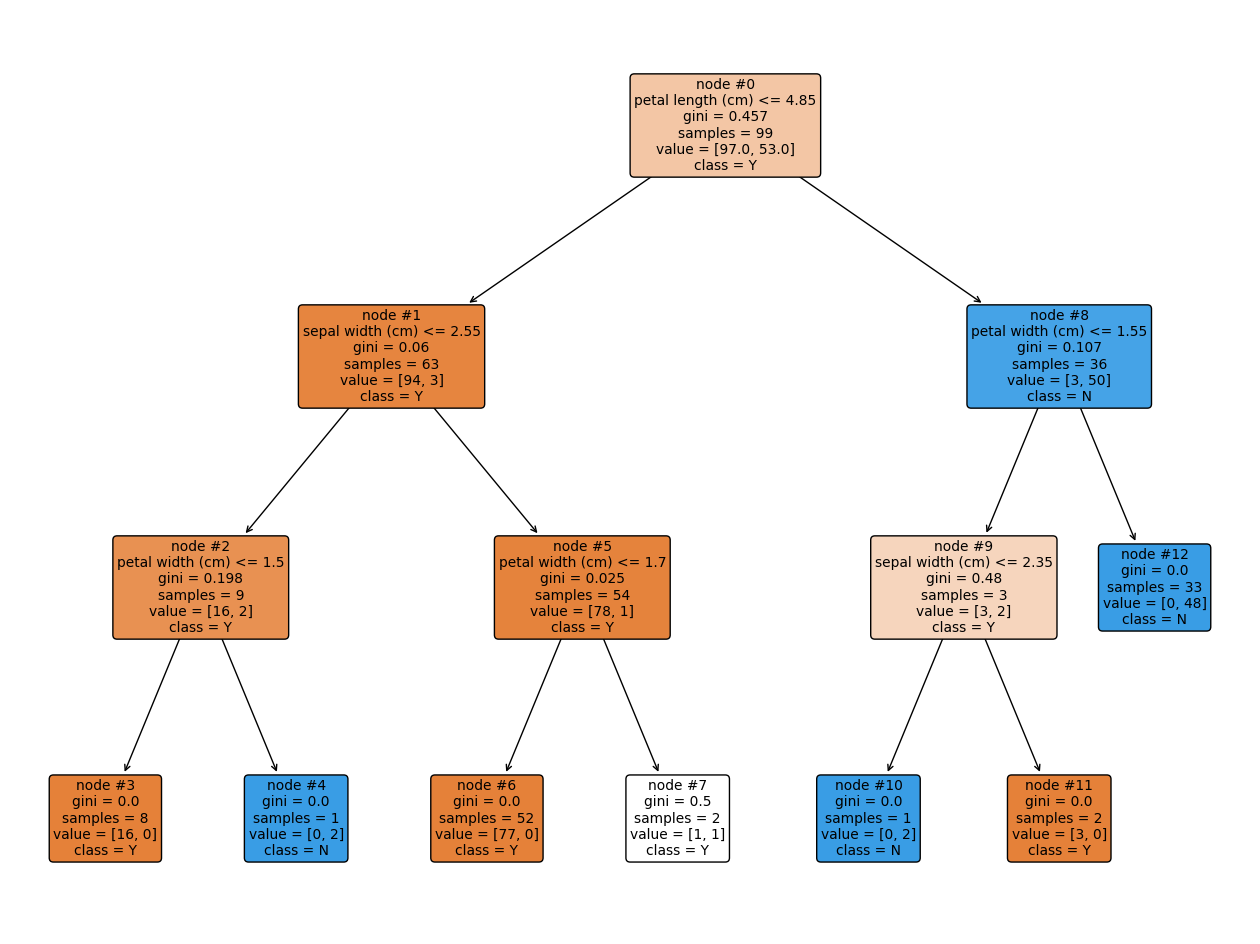

In [7]:
plt.figure(figsize=(16, 12))
tree.plot_tree(
    tree_list[1],
    filled=True,
    feature_names=iris["feature_names"],
    class_names=["Y", "N"],
    node_ids=True,
    rounded=True,
)
plt.show()

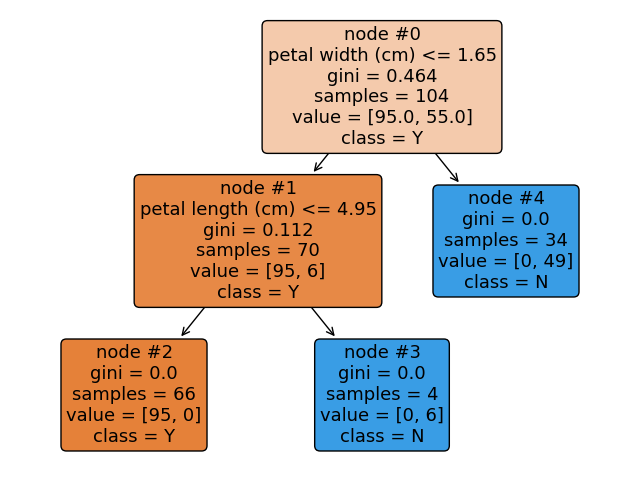

In [8]:
plt.figure(figsize=(8, 6))
tree.plot_tree(
    tree_list[2],
    filled=True,
    feature_names=iris["feature_names"],
    class_names=["Y", "N"],
    node_ids=True,
    rounded=True,
)
plt.show()

In [9]:
pd.DataFrame(
    {
        'feature': iris["feature_names"],
        'importance': rfc.feature_importances_
    }
).sort_values(by='importance', ascending=False)

,feature,importance
3,petal width (cm),0.476631
2,petal length (cm),0.361551
0,sepal length (cm),0.148572
1,sepal width (cm),0.013246


## Practical example

In [10]:
DATA_PATH = '../../data/'

In [11]:
hostel_data = pd.read_csv(DATA_PATH + "hostel-factors.csv")

features = {
    "f1": u"Staff",
    "f2": u"Hostel booking",
    "f3": u"Check-in and check-out",
    "f4": u"Room condition",
    "f5": u"Shared kitchen condition",
    "f6": u"Shared space condition",
    "f7": u"Extra services",
    "f8": u"General conditions & conveniences",
    "f9": u"Value for money",
    "f10": u"Customer Co-creation",
}

hostel_data.head()

,hostel,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,rating
0,hostel1,0.675000,0.100000,0.300000,0.875000,0.250000,0.425000,0.350000,0.725000,0.400000,0.275000,9.0
1,hostel2,0.500000,0.000000,0.058824,0.573529,0.117647,0.382353,0.000000,0.161765,0.308824,0.000000,8.3
2,hostel3,0.520833,0.041667,0.020833,0.666667,0.229167,0.437500,0.270833,0.250000,0.395833,0.270833,8.6
3,hostel4,0.692308,0.038462,0.038462,0.346154,0.076923,0.307692,0.500000,0.115385,0.153846,0.269231,7.6
4,hostel5,0.620690,0.000000,0.000000,0.517241,0.172414,0.344828,0.172414,0.379310,0.103448,0.310345,8.7


In [12]:
forest = RandomForestRegressor(
    n_estimators=1000,
    max_features=10,
    random_state=0
)

forest.fit(
    hostel_data.drop(["hostel", "rating"], axis=1),
    hostel_data["rating"]
)

importances = forest.feature_importances_

In [15]:
df_importance = pd.DataFrame(
    {
        'feature': features.values(),
        'importance': importances
    }
).sort_values(by='importance', ascending=False).reset_index(drop=True)
df_importance

,feature,importance
0,Staff,0.183150
1,Value for money,0.147704
2,Shared space condition,0.128188
3,Extra services,0.116819
4,Customer Co-creation,0.105748
5,General conditions & conveniences,0.088730
6,Shared kitchen condition,0.074776
7,Check-in and check-out,0.061881
8,Hostel booking,0.053899
9,Room condition,0.039105


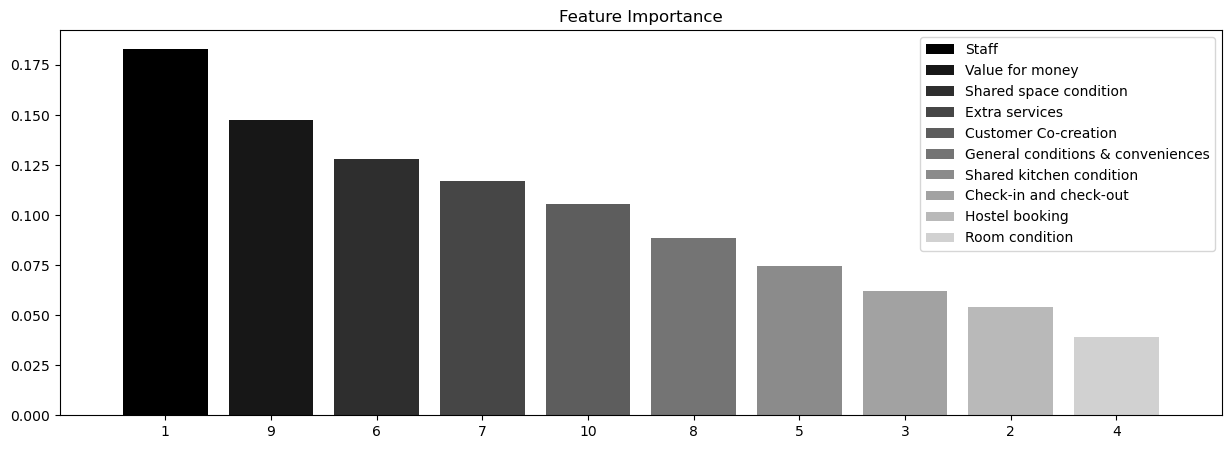

In [29]:
indices = np.argsort(importances)[::-1]
num_to_plot = 10
feature_indices = [ind + 1 for ind in indices[:num_to_plot]]

plt.figure(figsize=(15, 5))
plt.title(u"Feature Importance")
bars = plt.bar(
    range(num_to_plot),
    importances[indices[:num_to_plot]],
    color=([str(i / float(num_to_plot + 1)) for i in range(num_to_plot)]),
    align="center",
)
ticks = plt.xticks(range(num_to_plot), feature_indices)
plt.xlim([-1, num_to_plot])
plt.legend(bars, [u"".join(features["f" + str(i)]) for i in feature_indices]);